# COMP30760 Data Science in Python Assignment -2
### <font color = dark red>SURABHI AGARWAL - 17203535</font>

>- As a part of this assignment, I am going to scrape data from the following HTML page
http://mlg.ucd.ie/modules/COMP30760/timeseries.html
and analyse 4 stocks from the page given.

**_<font color= blue>The Stocks Selected: </font>_**
>- Apple (APPL)
>- Alphabet Inc. (GOOG)
>- Disney (DIS)
>- Microsoft (MSFT)


In [6]:
import pandas as pd
from pandas import Series
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# <font color = grey>Apple </font>

>- Stock analysis for the company apple 

## Task 1: Data Collection

>- Using python, I downloaded the HTML pages for my chosen stocks

## Task 2 : Data Preparation

**_<font color= blue>Parsing data: </font>_**
>- Using pandas libray, I parsed and extracted the data for the company APPLE and represented the whole dataset as a dataframe
>- Handling missing values
>- Saving and exporting the data into csv format

In [4]:

#Creating Apple dataframe and concatenting all the columns into one dataframe
apple_df = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/aapl.html")
apple_df = pd.concat(apple_df)
#Displaying the dataframe
apple_df
    

,Stock,Year,Month,Day,Open,High,Low,Close
0,AAPL,2012,1,3,58.485714,58.928570,58.428570,58.747143
1,AAPL,2012,1,4,58.571430,59.240002,58.468571,59.062859
2,AAPL,2012,1,5,59.278572,59.792858,58.952858,59.718571
3,AAPL,2012,1,6,59.967144,60.392857,59.888573,60.342857
4,AAPL,2012,1,9,60.785713,61.107143,60.192856,60.247143
...,...,...,...,...,...,...,...,...
206,AAPL,2019,10,25,243.160004,246.729996,242.880005,246.580002
207,AAPL,2019,10,28,247.419998,249.250000,246.720001,249.050003
208,AAPL,2019,10,29,248.970001,249.750000,242.570007,243.289993
209,AAPL,2019,10,30,244.759995,245.300003,241.210007,243.259995


**_<font color= blue>Representing data as time series: </font>_**
>- To represent data as time series, first I would combine the year, month and day column of the data frame
>- Use the date column as the index of the data frame
>- Display the dataframe

In [4]:
#representing data as time series
apple_df['Date'] = pd.to_datetime(apple_df[['Year', 'Month', 'Day']])
#setting the data column as index
apple_df.set_index('Date', inplace =True)
apple_df.head()

,Stock,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,,
2012-01-03,AAPL,2012,1,3,58.485714,58.928570,58.428570,58.747143
2012-01-04,AAPL,2012,1,4,58.571430,59.240002,58.468571,59.062859
2012-01-05,AAPL,2012,1,5,59.278572,59.792858,58.952858,59.718571
2012-01-06,AAPL,2012,1,6,59.967144,60.392857,59.888573,60.342857
2012-01-09,AAPL,2012,1,9,60.785713,61.107143,60.192856,60.247143


**_<font color= blue>Exporting data to an appropriate format: </font>_**
>- Exporting the raw data into csv file with date column

In [5]:
#Exporting the data to csv file
apple_df.to_csv("Apple Stock.csv", index=True, encoding='utf8')

In [6]:
#Dropping the the unnecessary columns
apple_df = apple_df.drop(["Stock", "Year", "Month", "Day"], axis=1)
#Diplaying the data frame
apple_df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143
2012-01-04,58.571430,59.240002,58.468571,59.062859
2012-01-05,59.278572,59.792858,58.952858,59.718571
2012-01-06,59.967144,60.392857,59.888573,60.342857
2012-01-09,60.785713,61.107143,60.192856,60.247143


**_<font color= blue>Handling missing values: </font>_**
> - Using interpolate method in the pandas library, I filled in the missing values in the dataframe

In [7]:
#Using df.interpolate, we can fill in the missing values in the dataframe
apple_df = apple_df.interpolate()
#Check if there are still any missing values left
apple_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
#Rounding off the stock figures to make sure there is consistency in the data 
apple_df = apple_df.round(2)
apple_df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.49,58.93,58.43,58.75
2012-01-04,58.57,59.24,58.47,59.06
2012-01-05,59.28,59.79,58.95,59.72
2012-01-06,59.97,60.39,59.89,60.34
2012-01-09,60.79,61.11,60.19,60.25


**_<font color= blue>Pre processing completed: </font>_**
> - The data contains no null values i.e there are no values in the dataset such as "Not Available", "NaN or "NA"
> - All the values are not strings either
> - This indicates that there all the values are present in the dataset.


## Task 3.1: Data Analysis: Summarising the cleaned dataset

**_<font color= blue>Descriptive Statistics: </font>_**
> - Displaying the descriptive statistics of the dataset
> - Using the cleaned dataset for further analysis and visualization
> - Grouping the data by year and taking mean of the values and displaying descriptive statistics



**_<font color= blue>Calculating mean of stocks for each year: </font>_**
>- This helps us understand net stock price for each year for easier visualization.

In [9]:
#Finding mean for each of the open, high, low and closing values of the stocks for each year
apple_df_year = apple_df.groupby(apple_df.index.year).mean().round(2)
#Displaying the most recent years that is the ending rows of the dataframe
apple_df_year.tail()

,Open,High,Low,Close
Date,,,,
2015,120.18,121.25,118.87,120.05
2016,104.51,105.43,103.70,104.63
2017,150.47,151.42,149.49,150.52
2018,189.08,191.00,187.18,189.06
2019,196.04,197.96,194.42,196.28


>- Above shown is the **mean** of all the **stock prices**(open, high, low, close) of **Apple** grouped by Year.
>- We can see that the Average Stock Prices *go up every year*.
>- We can also notice that there has been quite a huge increase in stock prices per share from mean value of ***120 dollars per share*** in 2015 to ***196 dollars per share*** in 2019.

In [10]:
#Using the pandas dataframe and the decribe method we can see the descriptive statistics
print("Apple Stock Descriptive Stats:")
apple_df.describe().round(2)

Apple Stock Descriptive Stats:


,Open,High,Low,Close
count,1971.00,1971.00,1971.00,1971.00
mean,123.84,124.94,122.72,123.85
std,46.72,47.16,46.36,46.77
min,55.42,57.09,55.01,55.79
25%,85.40,86.06,84.34,85.29
50%,112.21,113.25,111.23,112.18
75%,160.00,161.21,158.62,159.88
max,248.97,249.75,246.72,249.05


>- The above tables gives us the descriptive statistics of Apple stock market showing different statistics like mean, standard deviation, minimum and maximum values.
>- As we can notice that the mean prices of Apple stock has been around ***123 dollars per share*** and the maximum value of the stock price has been ***249 dollars*** per share.

## Task 3.2: Data Analysis: Data Visualization

**_<font color= blue>Characterising and Visualizing time series: </font>_**
>- Using matplotlib, I visualized the time series in order to gain characterisitic insights on daily, monthly, quarterly and annual frequencies.
>- Discussing how each time series is changing over time


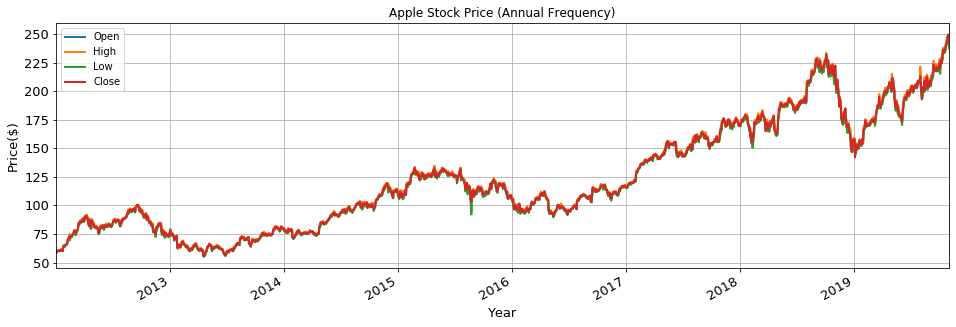

In [11]:
#Plotting visualization of time series to see change rate of stock price annually
apple_df["2012":"2019"].plot(figsize=(16, 5), fontsize=13, grid= True, linewidth = 2)
#Naming the plot
plt.title('Apple Stock Price (Annual Frequency)')
#Labelling the axis
plt.xlabel("Year",fontsize=13)
plt.ylabel("Price($)",fontsize=13);


>- The plot above shows the annual trend of stock prices for the company ***Apple*** from the year 2012-2019.
>- We notice that the overall trend of the ***closing*** stock prices is ***increasing***
>- However, it is interesting to notice the dip in the low stock prices in the middle of 2015 and also towards the end of each year and a strict rise from 2017 onwards.
>- It is also interesting to notice the fall in stock prices nearing the end of 2018 followed by a sudden increase following the year 2019.
>- Let us visualize the 2018-19 in terms of a monthly frequency to gain more insights.

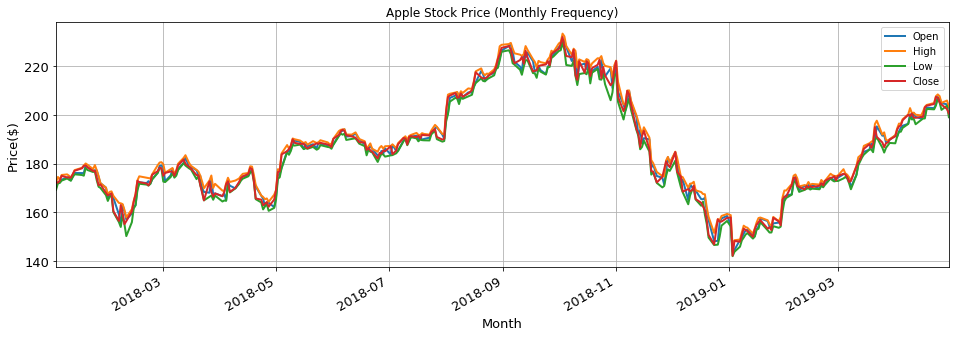

In [12]:
#Plotting visualizations of time series to see change rate of stock price monthly
apple_df["2018-01":"2019-04"].plot(figsize=(16, 5), fontsize=13, grid= True, linewidth = 2)
#Naming the plot
plt.title('Apple Stock Price (Monthly Frequency)')
#Labelling the axis
plt.xlabel("Month",fontsize=13)
plt.ylabel("Price($)",fontsize=13);

>- The plot above shows the monthly trend of stock prices for the company ***Apple*** from March 2018 to March 2019
>- We notice that the overall trend of the ***closing*** stock prices is seasonal affected by the chosen time period. We can see rise and falls in particular months.
>- We can see that from July 2018 there has been a steep rise in the stock prices and following the end of 2018, there has been a decreasing trend.
>- Following January 2019, there has been a ***strict increase***
>- Let us visualize the quarter from December 2018 to February 2019 in terms of a quarterly frequency to gain more insights.

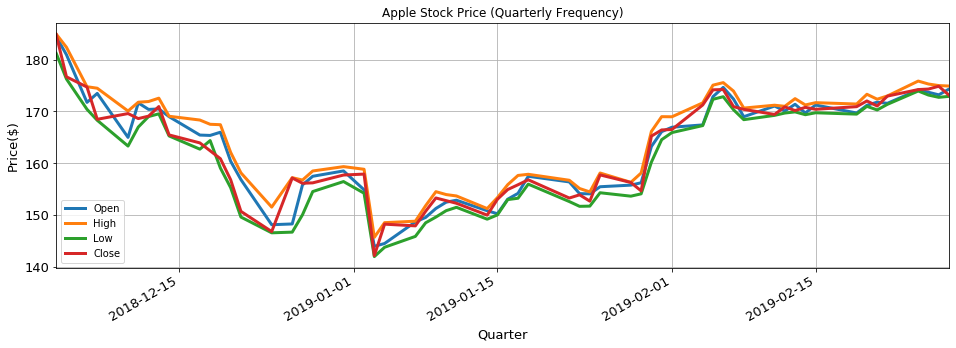

In [13]:
#Plotting visualization of time series to see change rate of stock price quarterly
apple_df["2018-12":"2019-02"].plot(figsize=(16, 5), fontsize=13, grid= True, linewidth = 3)
#Naming the plot
plt.title('Apple Stock Price (Quarterly Frequency)')
#Labelling the axis
plt.xlabel("Quarter",fontsize=13)
plt.ylabel("Price($)",fontsize=13);

>- The plot above shows the quaterly trend of stock prices for the company ***Apple*** from December 2018 to February 2019
>- We notice that the trend of the prices have been drecreasing for the first half of the quarter and increasing after January 2019.
>- The interesting part is the sudden fall in the prices in the first few days of January 2019 and an increase following those dates.
>- The trend following February 2019 has been more or less constant.
>- Let us visualize the daily frequency from January 2019 to February 2019 to gain more insights.

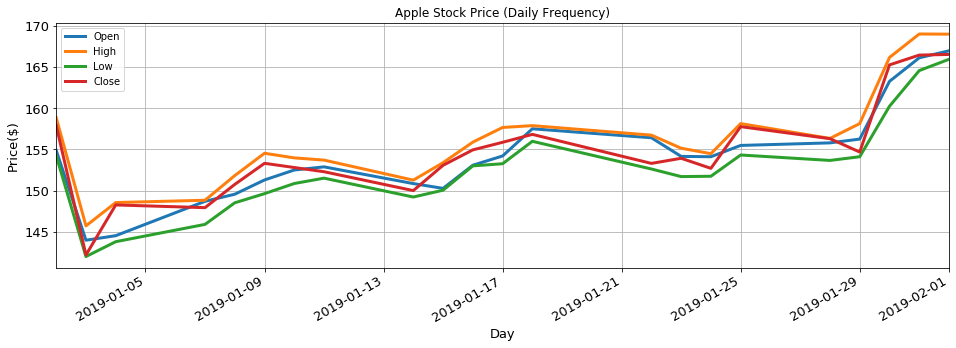

In [14]:
#Plotting visualization of time series to see change rate of stock price daily
apple_df["2019-01-01":"2019-02-01"].plot(figsize=(16, 5), fontsize=13, grid= True, linewidth = 3)
#Naming the plot
plt.title('Apple Stock Price (Daily Frequency)')
#Labelling the axis
plt.xlabel("Day",fontsize=13)
plt.ylabel("Price($)",fontsize=13);

>- The plot above shows the daily trend of stock prices for the company ***Apple*** from January 2019 to February 2019
>- We notice that overall that has been an ***increasing*** trend for the stock prices for each day of the month.
>- We can even notice several breaking points such as peaks and lows in a triangular increase fashion and a peak on the 29th of January.


## Task 3.3: Quantifying and Discussing the time series

**_<font color= blue>Discussing the changes in time series: </font>_**
>- Using matplotlib, I used different graphs like bar graphs and rolling mean line graphs, I discussed the plots in details to get more insights.


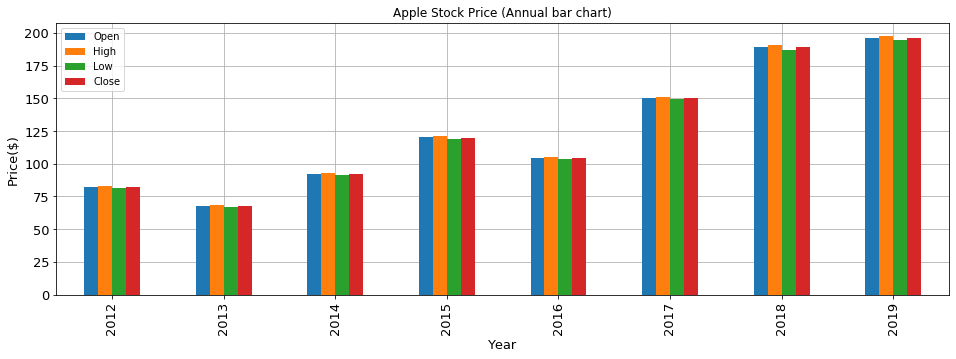

In [15]:
#Plotting bar graph visualization of time series to see change rate of stock price annually
apple_df_year.plot(kind = 'bar', figsize=(16, 5), fontsize=13, grid= True, linewidth = 2, stacked = False, zorder=3)
#Naming the plot
plt.title('Apple Stock Price (Annual bar chart)')
#Labelling the axis
plt.xlabel("Year",fontsize=13)
plt.ylabel("Price($)",fontsize=13);

>- The plot above shows that overall there has been a huge increase in the stock prices of Apple from 80 dollars per share in the year 2012 to 195 dollars per share in the year 2019.


Text(0, 0.5, 'Price($)')

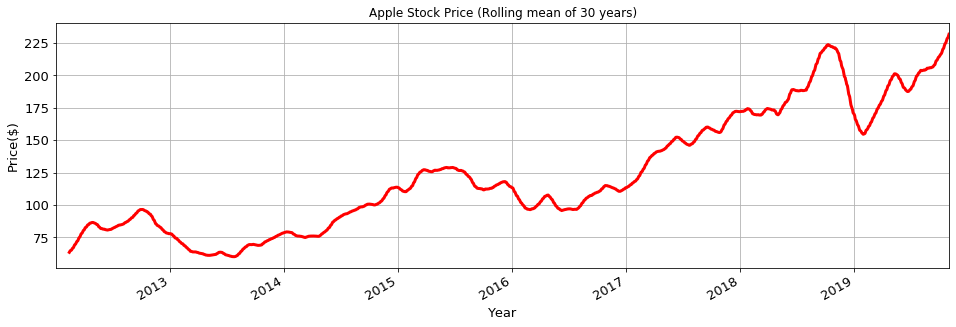

In [16]:
#Calculating 30 year rolling mean of APPLE stock prices
rm = apple_df["Close"].rolling(30).mean()
p = rm.plot(figsize=(16, 5), fontsize=13, grid = True, color= 'red', linewidth = 3)
#Naming the plot
plt.title('Apple Stock Price (Rolling mean of 30 years)')
#Labelling the axis
plt.xlabel("Year",fontsize=13)
plt.ylabel("Price($)",fontsize=13)


>- The above plot shows the rolling mean line graph for the company Apple. 
>- Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.
>- We are now able to see a visualization which is without any noise.
>- Clearly we can notice that there was a huge fall in stock prices of Apple nearing 2019 which I would be discussing in detail in my outlying observations.
